# 03 분류

지도 학습
- 회귀(값 예측)
- 분류(클래스 예측)

## 3.1 MINIST 데이터 셋

MINIST: 70,000개의 작은 숫자 이미지 + 라벨

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

d:\anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.datasets 패키지에 있는 함수
- fetch_*: 실전 데이터셋을 다운로드
- laod_*: 사이킷런에 포함된 소규모 데이터셋을 로드
- make_*: 테스트를 위한 가짜 데이터셋을 생성

생성된 데이터셋
- 넘파이 배열, 입력과 타깃 데이터를 담은 (X, y) 튜플
- sklearn.utils.Bumch 객체, DESCR, data, target 함목을 참조할 수 있는 딕셔너리

fetch_openml()은 기본적으로 입력을 판다스프레임, 에리블을 판다스 시리즈로 반환한다

MNIST 데이터셋은 이미지이므로 `as_frame=False`로 지정하여 넘파이 배열로 데이터를 받는다

`as_frame=auto`- 데이터셋이 희소 행렬로 저장되어 있지 않다면 데이터프레임(입력 데이터)과 시리즈(레이블)을 반환한다

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

70,000개의 이미지 x 784개의 특성

이미자가 28x28 팍셀이기 때문에, 각각의 특성은 0부터 255까지의 픽셀 강도를 나타낸다

샘플의 특성을 벡터로 추출해서 28x28 배열로 크기를 바꾸고 맷플롭립의 imshow() 함수를 사용해서 그린다

`cmap="binary"`: 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러 맵을 사용한다

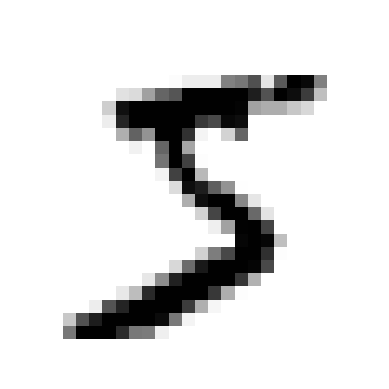

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [11]:
y[0]

'5'

데이터를 자세히 조사하기 전에 항상 테스트 세트를 만들고 따로 떼어놓아야 한다

fetch_openml()이 반환한 MNIST 데이터셋은 이미 훈련 세트와 테스트 세트로 나눠어져 있다.

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

훈련 세트는 이미 섰여 있어서 모든 교차 검증 폴드를 비슷하게 만든다.

알고리즘에 따라 훈련 세트의 순서를 섞거나 섞지 않아야 한다.
- 섞어야 하는 경우: 비슷한 샘플이 성능에 영향을 끼치는 경우. ex. SGD; 확률적 경사하강법(Stochastic Gradient Descent)
- 섞지 않아야 하는 경우: 시계열 데이터

## 3.2 이진 분류기 훈련

이진 분류기(binary classifer): ex. '5-감지기': '5'와 '5 아님' 두 클래스를 구분

In [13]:
y_train_5 = (y_train == '5') # 5는 True, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

분류 모델을 하나 선택해서 훈련

사이킷런의 SGDClassifier 클래스 (확률적 경사 하강법; SGD)
- 장점: 큰 데이터셋을 효율적으로 처리할 수 있다
- 한 번에 하나씩 훈련 샘플을 독립적으로 처리할 수 있다 (온라인 학습에 유리)

SGDClassifier 모델을 만들고 전체 훈련 세트를 사용해 훈련

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# 이 모델을 사용해 숫자 5의 이미지를 감지
sgd_clf.predict([some_digit]) # X[0]

array([ True])

분류기는 이 이미지가 5를 나타낸다고 추측(True)

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

`cross_val_score()` 함수로 폴드가 3개인 k-폴드 교차 검증을 사용해 `SGDClassifier` 모델을 평가할 수 있다

k-폴드 교차 검증
- 훈련 세트를 k개의 폴드로 나누고, 
- 평가를 위해 매번 다른 폴드를 떼어놓고
- 모델을 k번 훈련

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

모든 교차 검증 폴드에 대해 정확도가 95% 이상

가장 많이 등장하는 클래스('5 아님')로 분류하는 더미 분류기를 만들어 비교

In [16]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
# False 출력
# 즉, True로 예측된 것이 없다
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

정확도 90% 이상; 이미지의 10% 정도만 숫자 5이기 때문에 무조건 '5 아님'으로 예측하면 정확히 맞출 확률이 90% 이다

"정확도"를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여준다

**불균형한 데이터셋**을 다룰 때 더욱 그렇다

분류기의 성능을 평가하는 더 좋은 방법은 **오차 행렬(confusion matrix)**을 조사하는 것이다

### 3.3.2 오차 행렬

모든 A/B 쌍에 대해 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것

예. 숫자 8의 이미지를 0으로 잘못 분류한 횟수 = 오차 행렬에서 8번 행 0번 열

오차 행렬을 만들려면 실제 타깃과 비교할 수 있도록 예측값을 만들어야 한다. 

테스트 세트는 프로젝트의 맨 마지막에 분류기가 출시 준비를 마치고 나서 사용된다.

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

`cross_val_predict()` 함수는 k-폴드 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다

훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게 된다. (= 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측했다)

`confusion_matrix()` 함수를 사용해 오차 행렬을 만들 수 있다. 타깃 클래스(y_train_5)와 예측 클래스(y_train_pred)를 넣고 호출한다

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
# 오차 행렬
# 행: 실제 클래스
# 열: 예측한 클래스

# 1행: '5 아님' (음성 클래스)
# 53892: '5 아님'으로 정확하게 분류 (진짜 음성)
# 687: '5'라고 잘못 분류 (거짓 양성, 1종 오류)

# 2행: '5' (양성 클래스)
# 1891: '5 아님' 으로 잘못 분류 (거짓 음성, 2종 오류)
# 3530: '5;라고 정확하게 분류 (진짜 양성)

# 완벽한 분류기라면,
# 진짜 양성과 진짜 음성만 가지고 있을 것이므로
# 오차 행령의 주대각선만 0이 아닌 값이 된다

In [21]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

정밀도(precision): 양성 예측의 정확도

정밀도 = TP / (TP + FP)

TP: 진짜 양성 수, FP: 거짓 양성 수

재현율(recall)
- 분류기가 정확하게 감지한 양성 샘플의 비율
- = 민감도(sensitivity)
- = 진짜 양성 비율(true positive rate; TPR)

지현율 = TP / (TP + FN)

FN: 거짓 음성의 수

### 3.3.3 정밀도와 재현율

사이킷런은 정밀도와 재현율을 포함한 분류기의 지표를 계산하는 여러 함수를 제공한다

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 3530 / (687 + 3530)
# 0.8370879772350012
# 5로 판별된 이미지 중 83% 만 감지

recall_score(y_train_5, y_train_pred) # == 3530 / (1891 + 3530)
# 0.6511713705958311
# 전체 숫자 5에서 65%만 감지

0.6511713705958311

F1 점수(F1 score): 정밀도와 재현율의 **조화 평균(harmonic mean)**

조화 평균은 낮은 값에 훨씬 더 높은 비중을 둔다. 

결과적으로 분류기의 F1 점수가 높아지려면 재현율과 정밀도 모두 높아야 한다

```
F1 = 2 x (정밀도 x 재현율) / (정밀도 + 재현율)
```

F1 계산: `f1_score()`


In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

정밀도와 재현율이 비슷한 분류기에서 F1 점수가 높다.

상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있다. 

정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지다. -> **정밀도/재현율 트레이드오프**

### 3.3.4 정밀도/재현율 트레이드오프

결정 함수(decision function)를 사용하여 각 샘플의 점수를 계산

점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당

**결정 임곗값(decision threshold)** 

임곗값을 높이면 거짓 양성이 진짜 음성이 되어 정밀도가 높아지고, 진짜 양성 하나가 거짓 음성이 되어 재현율이 줄어든다.

반대로 임곗값을 내리면 재현율이 높아지고 정밀도가 줄어든다.

사이킷런에서는 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있다.

`decision_function()`메서드를 호출하면 각 샘플의 점수를 얻을 수 있다. 이 점수를 기반으로 원하는 임곗값을 정해 예측

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
# 임곗값을 높이는 경우 
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

실제로 숫자가 5이고 임곗값이 0일 때는 분류기가 이를 감지했지만 임곗값을 3000으로 높이면 이를 놓치게 된다

적절한 임곗값?

corss_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구한다. (결정 함수를 반환)

precision_recall_curve() 함수를 사용하여 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산할 수 있다. (무한한 임곗값에 해당하는 값으로 마지막 정밀도에 1을, 마지막 재현율에 0을 추가한다)

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율을 그릴 수 있다

임곗값이 3000일 때 그래프

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


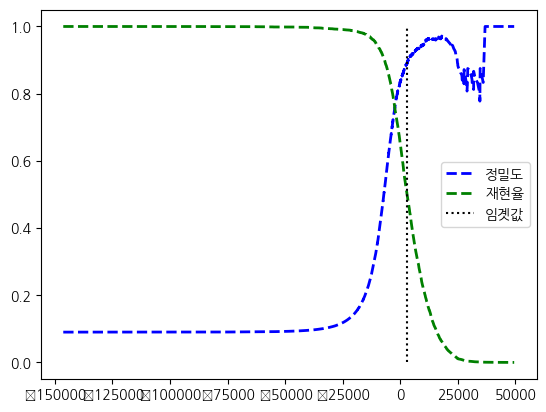

In [34]:
plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="재현율", linewidth=2)
plt.vlines(threshold,0, 1.0, "k", "dotted", label="임곗값")

plt.legend()
plt.show()


임곗값(3000)에서 정밀도는 약 90%이고 재현율을 약 50%이다.

좋은 정밀도와 재현율 트레이드오프를 선택하는 다른 방법은 "재현율에 대한 정밀도 곡선"을 그리는 것이다

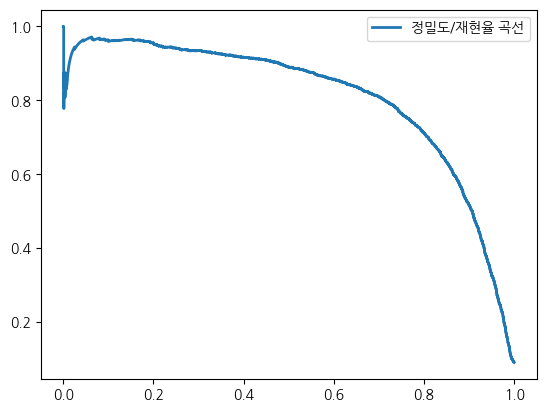

In [35]:
plt.plot(recalls, precisions, linewidth=2, label="정밀도/재현율 곡선")
plt.legend()
plt.show()

재현율 80% 근처에서 정밀도가 급격하게 줄어들기 시작한다. 이 하강점 직전을 정밀도/재현율 트레이드 오프로 선택하는 것이 좋다.

정밀도가 90%가 되는 가장 낮은 임곗값을 찾는 것

넘파이 배열의 `argmax()` 메서드는 사용할 수 있다. (최댓값의 첫 번째 인덱스를 반환한다)

In [40]:
import numpy as np

# idx_for_90_precision = (precisions >= 0.90).agrmax()
idx_for_90_precision = np.argmax(precisions >= 0.90)

threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [42]:
# 훈련 세트에 대한 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행한다

y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [43]:
# 이 예측에 대한 정밀도와 재현율을 확인
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [44]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

정밀도 90%를 달성한 분류기를 만들었지만, 재현율이 너무 낮다면 높은 정밀도의 분류기는 유용하지 않다

정밀도를 목표를 잡을 때 (ex. 99%) 재현율의 기준도 함께 잡아야 한다.

### 3.3.5 ROC 곡선